# Import Stuff

In [1]:
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
import pandas as pd
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
import plotly.offline as py
import plotly.graph_objs as go
import numpy as np
import seaborn as sns
py.init_notebook_mode(connected=True)
%matplotlib inline
%matplotlib notebook

Using TensorFlow backend.


In [3]:
data = pd.read_csv("/Users/az02210/Documents/Python/BitCoinPrediction/data/converged/merged.csv")

In [6]:
btc_trace = go.Scatter(x=data['stamp'], y=data['price'], name= 'Price')
py.iplot([btc_trace])

In [7]:
sent_trace = go.Scatter(x=data['stamp'], y=data['sentiment'], name= 'Sentiment')
py.iplot([sent_trace])

In [10]:
datag = data[['price','sentiment']].groupby(data['stamp']).mean()

## Training a simple random model:

In [11]:
from sklearn.preprocessing import MinMaxScaler
values = datag['price'].values.reshape(-1,1)
sentiment = datag['sentiment'].values.reshape(-1,1)
values = values.astype('float32')
sentiment = sentiment.astype('float32')
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)

In [12]:
train_size = int(len(scaled) * 0.7)
test_size = len(scaled) - train_size
train, test = scaled[0:train_size,:], scaled[train_size:len(scaled),:]
print(len(train), len(test))
split = train_size

448 193


In [13]:
def create_dataset(dataset, look_back, sentiment, sent=False):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back):
        if i >= look_back:
            a = dataset[i-look_back:i+1, 0]
            a = a.tolist()
            if(sent==True):
                a.append(sentiment[i].tolist()[0])
            dataX.append(a)
            dataY.append(dataset[i + look_back, 0])
    #print(len(dataY))
    return np.array(dataX), np.array(dataY)

### with lookback = 1 (kind of unigram)

In [14]:
look_back = 1
trainX, trainY = create_dataset(train, look_back, sentiment[0:train_size])
testX, testY = create_dataset(test, look_back, sentiment[train_size:len(scaled)])

In [15]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [16]:
model = Sequential()
model.add(LSTM(100, input_shape=(trainX.shape[1], trainX.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
history = model.fit(trainX, trainY, epochs=300, batch_size=100, validation_data=(testX, testY), verbose=0, shuffle=False)

TypeError: Expected int32, got <tf.Variable 'lstm_1_W_i:0' shape=(2, 100) dtype=float32_ref> of type 'Variable' instead.

In [33]:
yhat = model.predict(testX)
pyplot.plot(yhat, label='predict')
pyplot.plot(testY, label='true')
pyplot.legend()
pyplot.show()

In [34]:
yhat_inverse_1 = scaler.inverse_transform(yhat.reshape(-1, 1))
testY_inverse_1 = scaler.inverse_transform(testY.reshape(-1, 1))

In [35]:
rmse_1 = sqrt(mean_squared_error(testY_inverse_1, yhat_inverse_1))
print('Test RMSE: %.3f' % rmse_1)

Test RMSE: 60.814


In [164]:
model_1 = model

### with lookback = 2(kind of biram)

In [8]:
look_back = 2
trainX, trainY = create_dataset(train, look_back, sentiment[0:train_size])
testX, testY = create_dataset(test, look_back, sentiment[train_size:len(scaled)])

In [9]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [10]:
model = Sequential()
model.add(LSTM(100, input_shape=(trainX.shape[1], trainX.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
history = model.fit(trainX, trainY, epochs=300, batch_size=100, validation_data=(testX, testY), verbose=0, shuffle=False)

<IPython.core.display.Javascript object>


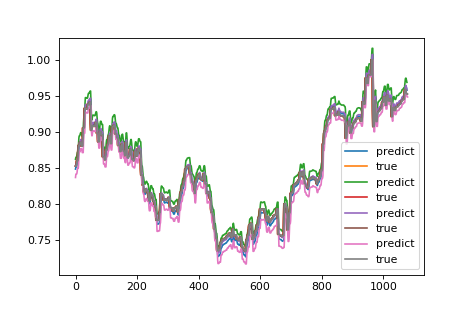

In [11]:
yhat = model.predict(testX)
pyplot.plot(yhat, label='predict')
pyplot.plot(testY, label='true')
pyplot.legend()
pyplot.show()

In [12]:
yhat_inverse_2 = scaler.inverse_transform(yhat.reshape(-1, 1))
testY_inverse_2 = scaler.inverse_transform(testY.reshape(-1, 1))

In [13]:
rmse_2 = sqrt(mean_squared_error(testY_inverse_2, yhat_inverse_2))
print('Test RMSE: %.3f' % rmse_2)

Test RMSE: 47.262


In [35]:
model2 = model

## With lookback = 3

In [33]:
look_back = 3
trainX, trainY = create_dataset(train, look_back, sentiment[0:train_size])
testX, testY = create_dataset(test, look_back, sentiment[train_size:len(scaled)])

2517
1076


In [34]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [36]:
model = Sequential()
model.add(LSTM(100, input_shape=(trainX.shape[1], trainX.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
history = model.fit(trainX, trainY, epochs=300, batch_size=100, validation_data=(testX, testY), verbose=0, shuffle=False)

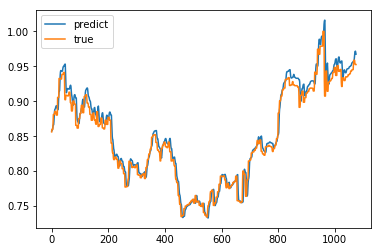

In [37]:
yhat = model.predict(testX)
pyplot.plot(yhat, label='predict')
pyplot.plot(testY, label='true')
pyplot.legend()
pyplot.show()

In [38]:
yhat_inverse_3 = scaler.inverse_transform(yhat.reshape(-1, 1))
testY_inverse_3 = scaler.inverse_transform(testY.reshape(-1, 1))

In [39]:
rmse_3 = sqrt(mean_squared_error(testY_inverse_3, yhat_inverse_3))
print('Test RMSE: %.3f' % rmse_3)

Test RMSE: 60.197


In [40]:
model3 = model

## Plotting different lookups

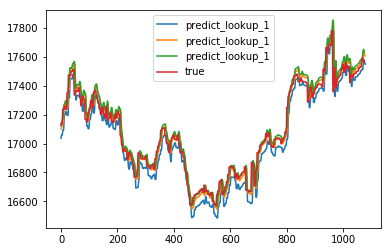

In [43]:
pyplot.plot(yhat_inverse_1, label='predict_lookup_1')
pyplot.plot(yhat_inverse_2, label='predict_lookup_1')
pyplot.plot(yhat_inverse_3, label='predict_lookup_1')
pyplot.plot(testY_inverse_3, label='true')
pyplot.legend()
pyplot.show()

In [56]:
len(datag.index.values)

3605

In [63]:
btc_1_trace = go.Scatter(x=datag.index.values[3605-1080-1:], y=yhat_inverse_1.reshape(1080), name= 'predict_lookup_1')
btc_2_trace = go.Scatter(x=datag.index.values[3605-1078-1:], y=yhat_inverse_2.reshape(1078), name= 'predict_lookup_2')
btc_3_trace = go.Scatter(x=datag.index.values[3605-1076-1:], y=yhat_inverse_3.reshape(1076), name= 'predict_lookup_3')
btc_t_trace = go.Scatter(x=datag.index.values[3605-1080-1:], y=testY_inverse_1.reshape(1080), name= 'True')

py.iplot([btc_1_trace,btc_2_trace, btc_3_trace, btc_t_trace])

# With sentiment and lookup2

In [14]:
look_back = 2
trainX, trainY = create_dataset(train, look_back, sentiment[0:train_size],sent=True)
testX, testY = create_dataset(test, look_back, sentiment[train_size:len(scaled)], sent=True)

In [15]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [26]:
model = Sequential()
model.add(LSTM(100, input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
model.add(LSTM(100))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
history = model.fit(trainX, trainY, epochs=300, batch_size=100, validation_data=(testX, testY), verbose=0, shuffle=False)

In [27]:
yhat = model.predict(testX)
pyplot.plot(yhat, label='predict')
pyplot.plot(testY, label='true')
pyplot.legend()
pyplot.show()

In [28]:
yhat_inverse_sent = scaler.inverse_transform(yhat.reshape(-1, 1))
testY_inverse_sent = scaler.inverse_transform(testY.reshape(-1, 1))

In [29]:
rmse_sent = sqrt(mean_squared_error(testY_inverse_sent, yhat_inverse_sent))
print('Test RMSE: %.3f' % rmse_sent)

Test RMSE: 44.563


In [ ]:
len(yhat)

In [36]:
btc_1_trace = go.Scatter(x=datag.index.values[3605-1078-1:][0:500], y=yhat_inverse_sent.reshape(1078)[0:500], name= 'With_Sentiment')
btc_2_trace = go.Scatter(x=datag.index.values[3605-1080-1:][0:500], y=yhat_inverse_1.reshape(1080)[0:500], name= 'No_Sentiment')
btc_3_trace = go.Scatter(x=datag.index.values[3605-1078-1:][0:500], y=testY_inverse_sent.reshape(1078)[0:500], name= 'True')
py.iplot([btc_1_trace,btc_2_trace,btc_3_trace])

In [18]:
model_sent = model

## Now go live with the model:

In [67]:
import MySQLdb
#Enter the values for you database connection
dsn_database = "bitcoin"         # e.g. "MySQLdbtest"
dsn_hostname = "173.194.231.244"      # e.g.: "mydbinstance.xyz.us-east-1.rds.amazonaws.com"
dsn_port = 3306                  # e.g. 3306 
dsn_uid = "demo"             # e.g. "user1"
dsn_pwd = "qwerty@123"              # e.g. "Password123"

In [68]:
conn = MySQLdb.connect(host=dsn_hostname, port=dsn_port, user=dsn_uid, passwd=dsn_pwd, db=dsn_database)

In [69]:
cursor=conn.cursor()
cursor.execute("""SELECT * FROM live_data""")
cursor.fetchone()

(1234.0, 123.0, 456.0, datetime.date(2009, 2, 2))

In [70]:
print ("\nShow me the records:\n")
rows = cursor.fetchall()
import pprint
pprint.pprint(rows)


Show me the records:

()


In [71]:
cursor.execute("""INSERT INTO live_data values(15625,16000,0.8,'1000-01-01 00:00:00');""")

1

In [73]:
conn.commit()

In [66]:
cursor.close()

In [172]:
# develop a real time pipeline

In [27]:
import queue 
import time
import matplotlib

In [28]:
matplotlib.__version__

'2.1.0'

In [84]:
import queue
import matplotlib.pyplot as plt
true_q = queue.Queue()
pred_q = queue.Queue()
'''
fig = plt.figure()
ax = fig.add_subplot(111)
fig.show()
fig.canvas.draw()
plt.ion()
'''

def process_data(in_data):
    out_data = []
    for line in in_data:
        out_data.append(float(line.split(',')[0]))
    return np.array(out_data).reshape(-1,1)
prev = 15000
threshold = 0.5
while True:
    btc = open('live_bitcoin.csv','r')
    sent = open('live_tweet.csv','r')
    bit_data = btc.readlines()
    sent_data = sent.readlines()
    bit_data = process_data(bit_data[len(bit_data)-5:])
    sent_data = process_data(sent_data[len(sent_data)-5:])
    live = scaler.transform(bit_data)
    testX, testY = create_dataset(live, 2, sent_data, sent=True)
    testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
    yhat = model.predict(testX)
    yhat_inverse = scaler.inverse_transform(yhat.reshape(-1, 1))
    true_q.put(bit_data[4])
    pred_q.put(yhat_inverse[0])
    val = 100*((yhat_inverse[0][0] - prev)/prev)
    if val > threshold:
        decision = 'buy'
    elif val <-threshold:
        decision = 'sell'
    else:
        decision = ''
    prev = yhat_inverse[0][0]
    input_string = "INSERT INTO live_data values ({},{},{},'{}','{}');".format(yhat_inverse[0][0],bit_data[0][0],sent_data[4][0],datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S '),decision)
    cursor.execute(input_string)
    conn.commit()
    time.sleep(60)
    '''
    if true_q.qsize() > 9:
        true_q.get()
        pred_q.get()
        ax.clear()
        ax.plot()
        ax.plot(list(true_q.queue),'-',label='True')
        ax.plot(list(pred_q.queue),'--',label='Predict')
        ax.legend()
        fig.canvas.draw()
        time.sleep(60)
    ''' 
        

KeyboardInterrupt: 

In [75]:
import datetime
datetime.datetime.now()

datetime.datetime(2017, 12, 13, 21, 49, 54, 337601)